In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
path_wd='./drive/MyDrive/MineriaIII'
os.chdir(path_wd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import cv2
from itertools import groupby

path_models='models/'
path_predictions='predictions/'
path_data='Sentinel2LULC_354/'
path_test='Test 2/'

In [3]:
data = []
labels = []
labelnames = {}
ghm = {}
prob = {}

for d in os.listdir(path_data):
  lab = int(d.split('_')[0])
  labelnames[str(lab)] = re.search('_+([a-zA-Z]+)_+', d).group(1)
  prob[str(lab)] = []
  ghm[str(lab)] = []
  for f in os.listdir(path_data + d):
    try:
      img = cv2.imread(path_data + d + '/' + f)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      data.append(img)
      labels.append(lab)
      other_data = re.search('^\d{1,2}_+[A-Za-z]+_+([0-9.%]+)_+\d+_+([0-9.%]+)_+', f)
      try:
        prob[str(lab)].append(float(other_data.group(1).replace('%','')))
      except:
        prob[str(lab)].append(np.mean(prob) if len(prob)>0 else 100.0)
      try:
        ghm[str(lab)].append(float(other_data.group(2).replace('%','')))
      except:
        ghm[str(lab)].append(np.mean(ghm) if len(ghm)>0 else 50.0)
    except:
      print("Cannot read file: " + d + '/' + f)

data = np.array(data)

In [9]:
test_data = []
test_labels = []
test_ids = []
test_ghm = {}
test_prob = {}
classes = np.unique(np.sort(labels))

for lab in classes:
  test_ghm[str(lab)] = []
  test_prob[str(lab)] = []

for f in os.listdir(path_test):
  lab = int(f.split('_')[0])
  try:
    img = cv2.imread(path_test + f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_data.append(img)
    test_labels.append(lab)
    test_ids.append(f)
    other_data = re.search('^\d{1,2}_+[A-Za-z]+_+([0-9.%]+)_+\d+_+([0-9.%]+)_+', f)
    try:
      test_prob[str(lab)].append(float(other_data.group(1).replace('%',''))/10)
    except:
      test_prob[str(lab)].append(np.mean(test_prob) if len(test_prob)>0 else 100.0)
    try:
      test_ghm[str(lab)].append(float(other_data.group(2).replace('%',''))/10)
    except:
      test_ghm[str(lab)].append(np.mean(test_ghm) if len(test_ghm)>0 else 10.0)
  except:
      print("Cannot read file: " + f)
        
test_data = np.array(test_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


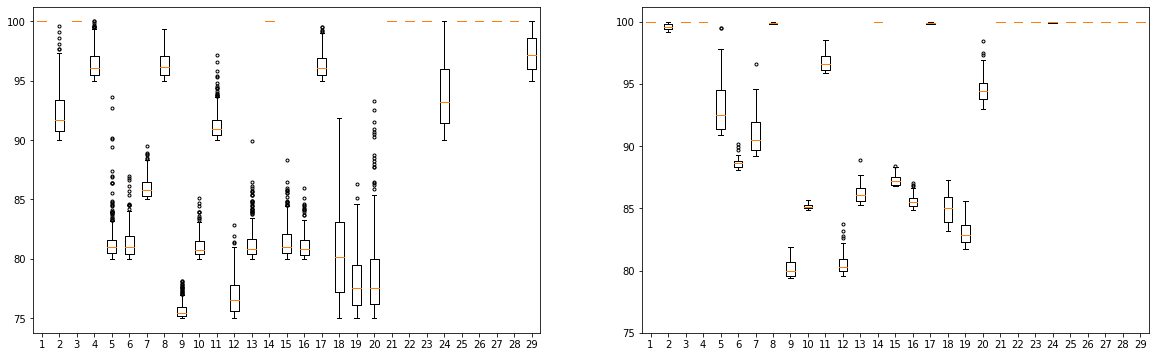

In [35]:
prob_data = [prob[str(lab)] for lab in classes]
prob_test_data = [test_prob[str(lab)] for lab in classes]
fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].boxplot(prob_data, sym='.')
ax[0].title.set_text('')
ax[1].boxplot(prob_test_data, sym='.')
ax[1].set_ylim([75, 101.2]) #hay un outlier con un prob muy bajo en la clase 29 de test
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


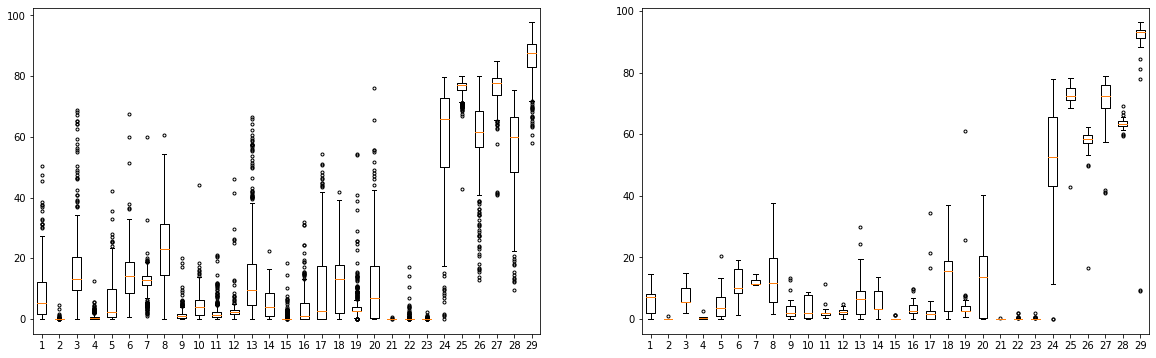

In [36]:
ghm_data = [ghm[str(lab)] for lab in classes]
ghm_test_data = [test_ghm[str(lab)] for lab in classes]
fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].boxplot(ghm_data, sym='.')
ax[1].boxplot(ghm_test_data, sym='.')
plt.show()